**EDA분석** 

샘플이 구조적으로 일관되고, 후속 규칙 매핑이 가능한 형태인지를 점검(설계 검증용)

총 88개의 데이터 샘플을 기반으로 6가지 장소, 7가지 목표, 5가지 소음 구간의 조합을 분석 

① 위치별 평균/분산 데시벨 분석

In [1]:
import os
os.getcwd()


'c:\\Users\\seonu\\Documents\\soundscape_project\\sampledata\\EDA_sampledata'

In [2]:
os.chdir(r"C:\Users\seonu\Documents\soundscape_project")


In [3]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- 0) 입력 경로 ----------
input_path = "sampledata/sample_input_v2.json"

if not os.path.exists(input_path):
    raise FileNotFoundError(f"파일을 찾을 수 없어요: {input_path}")

with open(input_path, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.json_normalize(data)

C:\Users\seonu\AppData\Local\Temp\ipykernel_19824\1776458849.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("location")["decibel"]


,location,mean,std,var,count,min,max
0,cafe,67.38,11.63,135.26,13,40,85
1,library,43.29,13.54,183.22,17,30,85
2,subway,77.73,12.86,165.35,15,40,95
3,office,59.20,9.92,98.46,15,40,85
4,outdoor,67.08,14.30,204.58,13,40,95
5,home,55.00,13.26,175.86,15,30,85


C:\Users\seonu\AppData\Local\Temp\ipykernel_19824\1776458849.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("location")["energy"]


,location,mean,std,var,count,min,max
0,cafe,0.39,0.14,0.02,13,0.2,0.70
1,library,0.36,0.13,0.02,17,0.2,0.65
2,subway,0.40,0.19,0.03,15,0.2,0.80
3,office,0.43,0.18,0.03,15,0.2,0.75
4,outdoor,0.37,0.13,0.02,13,0.2,0.70
5,home,0.32,0.13,0.02,15,0.2,0.70


C:\Users\seonu\AppData\Local\Temp\ipykernel_19824\1776458849.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(plot_data, labels=labels, patch_artist=True, showfliers=True)


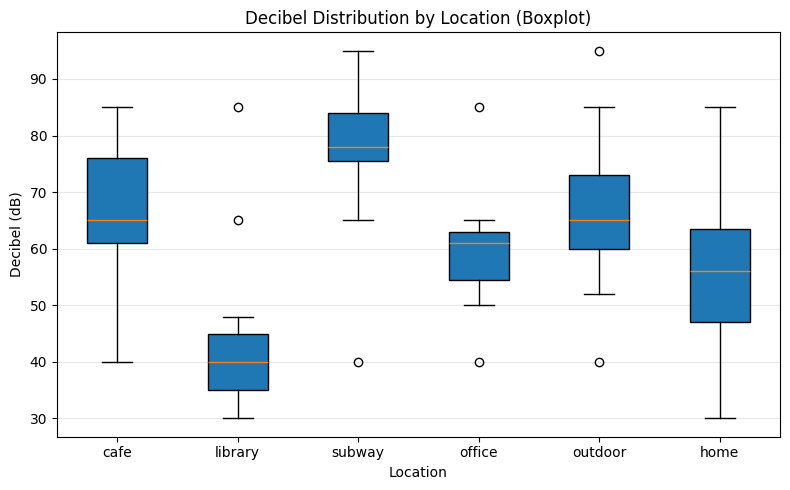

C:\Users\seonu\AppData\Local\Temp\ipykernel_19824\1776458849.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(plot_data, labels=labels, patch_artist=True, showfliers=True)


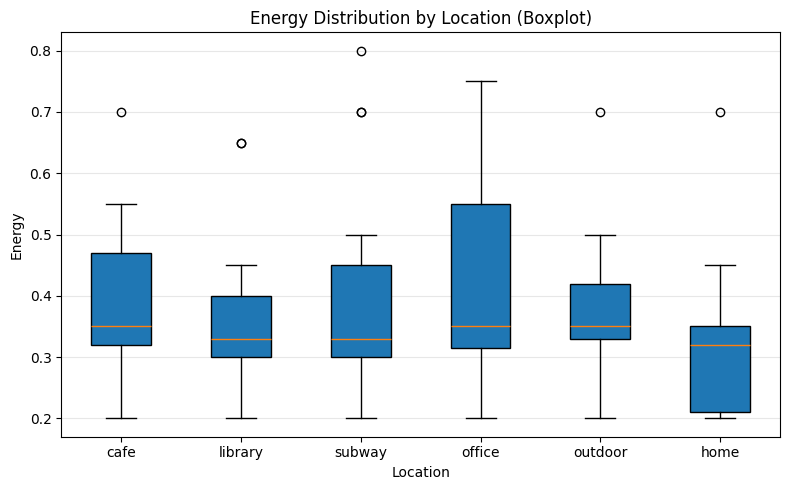

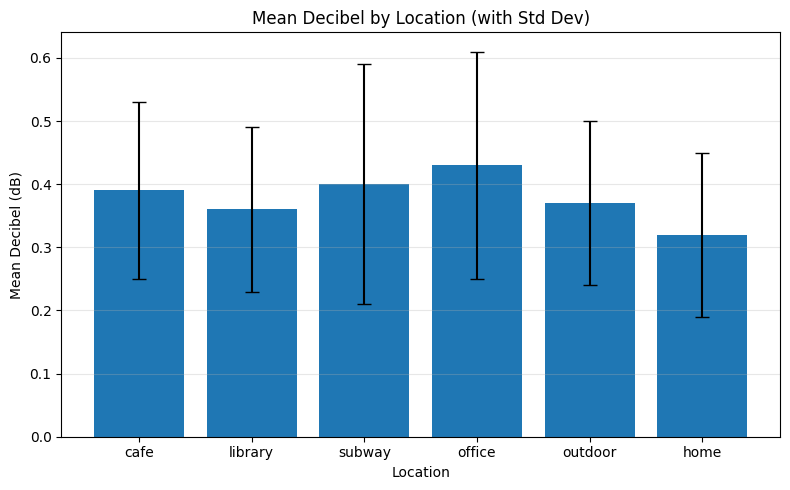

C:\Users\seonu\AppData\Local\Temp\ipykernel_19824\1776458849.py:79: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="location", columns="db_band", values="decibel", aggfunc="count", fill_value=0)


db_band,0-35,36-50,51-65,66-80,81+
location,,,,,
cafe,0,1,6,5,1
library,5,10,1,0,1
subway,0,1,1,6,7
office,0,3,11,0,1
outdoor,0,1,7,3,2
home,1,5,8,0,1


In [6]:
# ---------- 1) 기본 정리 ----------
# 위치(category) 정렬: 서비스 주요 카테고리 우선
loc_order = ["cafe","library","subway","office","outdoor","home"]
df["location"] = pd.Categorical(df["location"], categories=loc_order, ordered=True)

# ---------- 2) 위치별 데시벨 통계표 (평균, 표준편차, 분산, 개수, 최소/최대) ----------
stats = (
    df.groupby("location")["decibel"]
      .agg(mean="mean", std="std", var="var", count="count", min="min", max="max")
      .reset_index()
      .sort_values("location")
)
# 소수점 보기 좋게
stats[["mean","std","var"]] = stats[["mean","std","var"]].round(2)
display(stats)

# ---------- 2) 위치별 에너지 통계표 (평균, 표준편차, 분산, 개수, 최소/최대) ----------
stats = (
    df.groupby("location")["energy"]
      .agg(mean="mean", std="std", var="var", count="count", min="min", max="max")
      .reset_index()
      .sort_values("location")
)
# 소수점 보기 좋게
stats[["mean","std","var"]] = stats[["mean","std","var"]].round(2)
display(stats)

# ---------- 3) 박스플롯: 위치별 데시벨 분포 ----------
plt.figure(figsize=(8,5))
# Matplotlib boxplot은 카테고리 순서대로 그리려면 리스트로 전달
plot_data = [df.loc[df["location"]==loc, "decibel"].dropna().values for loc in loc_order if (df["location"]==loc).any()]
labels = [loc for loc in loc_order if (df["location"]==loc).any()]

bp = plt.boxplot(plot_data, labels=labels, patch_artist=True, showfliers=True)
plt.title("Decibel Distribution by Location (Boxplot)")
plt.xlabel("Location")
plt.ylabel("Decibel (dB)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 3.5) 박스플롯: 위치별 에너지 분포 ----------
plt.figure(figsize=(8,5))
# Matplotlib boxplot은 카테고리 순서대로 그리려면 리스트로 전달
plot_data = [df.loc[df["location"]==loc, "energy"].dropna().values for loc in loc_order if (df["location"]==loc).any()]
labels = [loc for loc in loc_order if (df["location"]==loc).any()]

bp = plt.boxplot(plot_data, labels=labels, patch_artist=True, showfliers=True)
plt.title("Energy Distribution by Location (Boxplot)")
plt.xlabel("Location")
plt.ylabel("Energy")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 4) 평균 막대그래프(+표준편차 에러바) ----------
plt.figure(figsize=(8,5))
x = np.arange(len(stats))
means = stats["mean"].values
stds  = stats["std"].fillna(0).values  # 표본 1개면 NaN → 0 처리

plt.bar(x, means)
plt.errorbar(x, means, yerr=stds, fmt='none', ecolor='black', capsize=5)
plt.xticks(x, stats["location"].tolist())
plt.title("Mean Decibel by Location (with Std Dev)")
plt.xlabel("Location")
plt.ylabel("Mean Decibel (dB)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 5) 참고: 소음 구간별 분포표(경계 적절성 점검용, 선택) ----------
# 구간: 0–35, 36–50, 51–65, 66–80, 81+
bins = [0,35,50,65,80,200]
labels_bins = ["0-35","36-50","51-65","66-80","81+"]
df["db_band"] = pd.cut(df["decibel"], bins=bins, labels=labels_bins, right=True, include_lowest=True)

band_table = (
    df.pivot_table(index="location", columns="db_band", values="decibel", aggfunc="count", fill_value=0)
      .reindex(index=loc_order)
)
display(band_table)

# (원하면 스택형 막대 그래프를 추가로 그릴 수 있음)

1.1 위치별 평균 데시벨 통계

-> 장소별 평균 데시벨이 40~80dB 범위에 고르게 분포

-> 설정한 소음 구간 경계(35, 50, 65, 80dB)가 실제 환경을 잘 반영

-> 도서관(43dB)과 지하철(78dB)의 명확한 대비로 구간 구분 타당성 확보

1.2 위치별 소음 구간 분포

-> 각 장소가 예상되는 소음 구간에 집중 분포

-> 도서관: 50dB 이하 집중 (조용한 환경)

-> 지하철: 66dB 이상 집중 (고소음 환경)

-> 카페/사무실: 51-65dB 중심 (일상 소음)

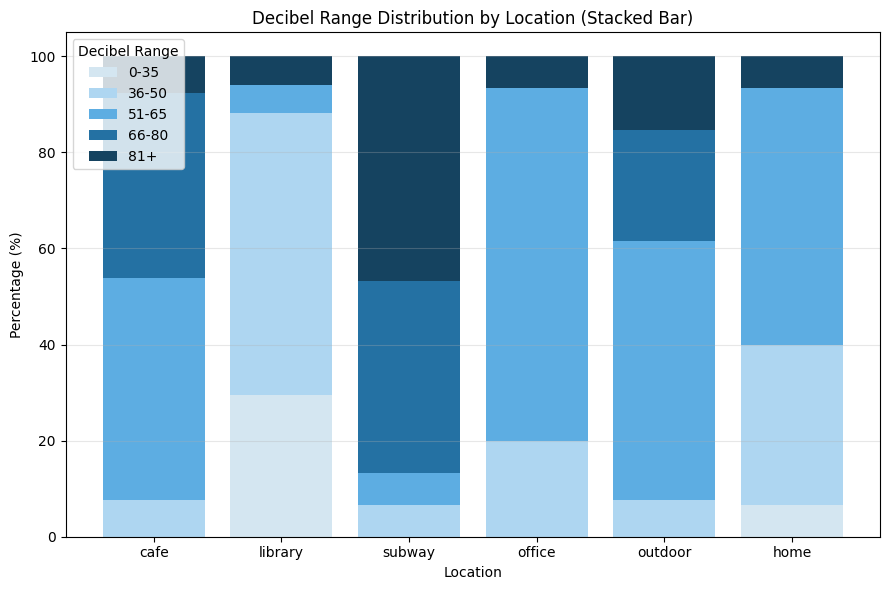

In [10]:
# ---------- 6) 스택형 막대그래프: 위치별 소음 구간 분포 ----------
plt.figure(figsize=(9,6))
band_table_percent = band_table.div(band_table.sum(axis=1), axis=0) * 100  # 퍼센트 변환

bottoms = np.zeros(len(band_table_percent))
colors = ["#d4e6f1", "#aed6f1", "#5dade2", "#2471a3", "#154360"]

for i, col in enumerate(band_table_percent.columns):
    plt.bar(
        band_table_percent.index,
        band_table_percent[col],
        bottom=bottoms,
        label=col,
        color=colors[i % len(colors)]
    )
    bottoms += band_table_percent[col].values

plt.title("Decibel Range Distribution by Location (Stacked Bar)")
plt.xlabel("Location")
plt.ylabel("Percentage (%)")
plt.legend(title="Decibel Range")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


② 목표별 음악 속성 분포 (BPM, Energy, Mood)

▶ 목표별 BPM 통계


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3397592777.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("goal")["bpm"]
C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3397592777.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("goal")["energy"]


,count,mean,std,min,max
goal,,,,,
focus,14,80.29,4.55,72,90
relax,13,66.92,8.57,55,92
meditate,9,57.78,2.64,55,60
sleep,12,55.00,0.00,55,55
active,12,114.17,3.16,110,120
reading,10,61.00,2.31,58,65
neutral,18,61.67,0.77,60,62



▶ 목표별 Energy 통계


,count,mean,std,min,max
goal,,,,,
focus,14,0.454,0.044,0.38,0.55
relax,13,0.368,0.049,0.30,0.50
meditate,9,0.274,0.030,0.25,0.32
sleep,12,0.202,0.006,0.20,0.22
active,12,0.698,0.043,0.65,0.80
reading,10,0.314,0.023,0.30,0.35
neutral,18,0.328,0.004,0.32,0.33


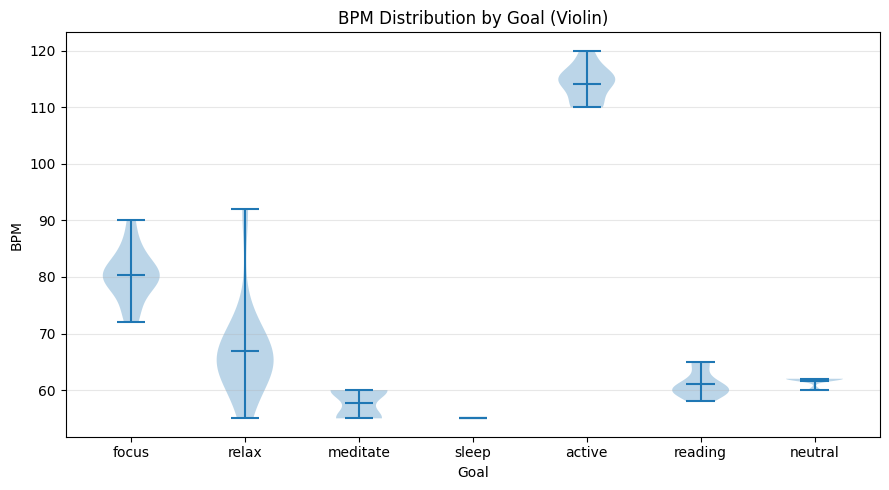

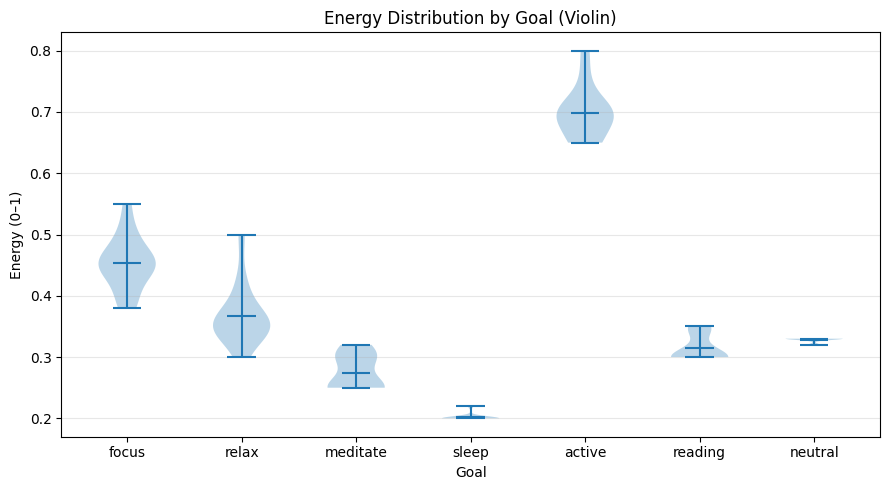

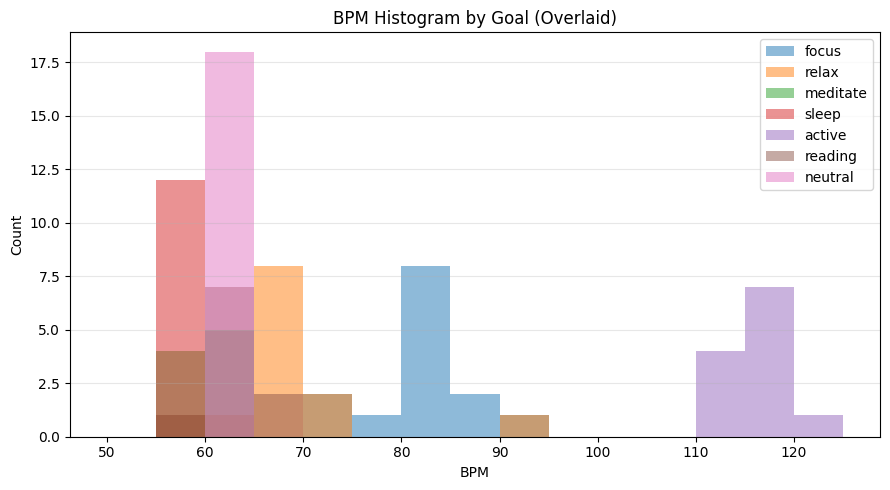

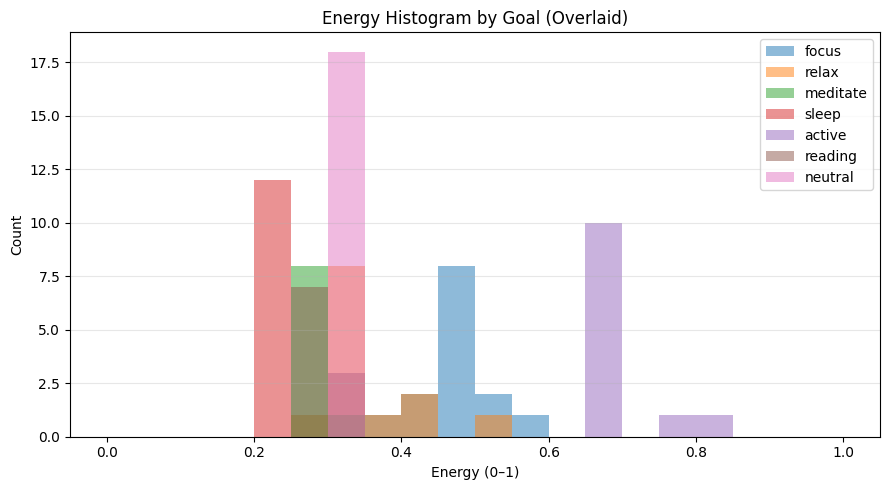


▶ 목표×Mood 분포 (건수)


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3397592777.py:88: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index="goal", columns="mood", values="bpm", aggfunc="count", fill_value=0)


mood,calm,chill,energetic,neutral,noise-masking,serene,soft,soothing,upbeat
goal,,,,,,,,,
focus,13,0,0,1,0,0,0,0,0
relax,1,11,0,0,1,0,0,0,0
meditate,0,0,0,0,4,5,0,0,0
sleep,0,0,0,0,0,0,0,12,0
active,0,0,2,0,0,0,0,0,10
reading,0,0,0,0,0,0,10,0,0
neutral,0,0,0,18,0,0,0,0,0


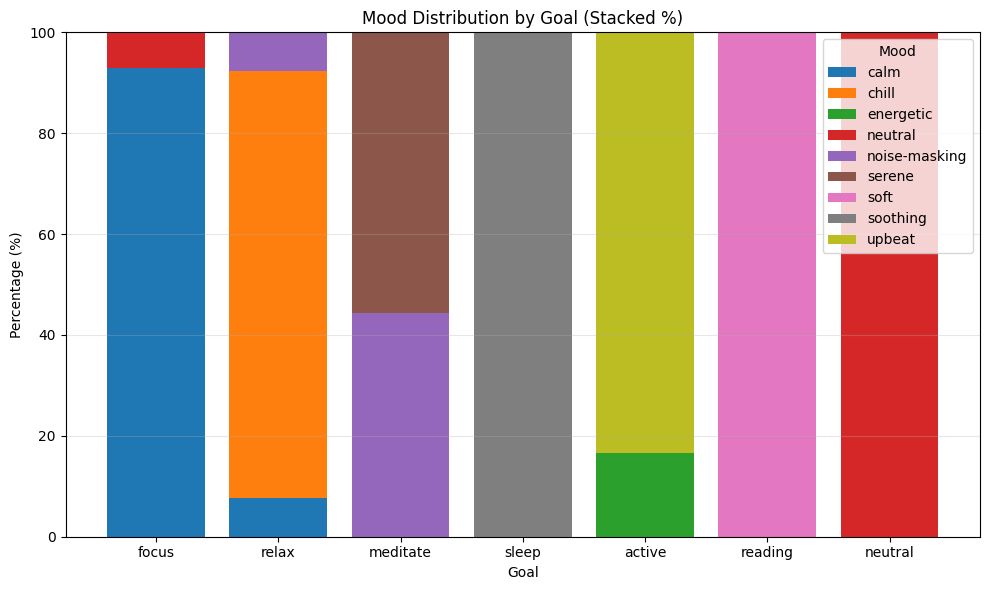

In [11]:
# ---------- 1) 기본 정리 ----------
goal_order = ["focus","relax","meditate","sleep","active","reading","neutral"]
df["goal"] = pd.Categorical(df["goal"], categories=goal_order, ordered=True)

# 안전 검사: 필요한 컬럼 존재 여부
needed = {"goal","bpm","energy","mood"}
missing = needed - set(df.columns)
if missing:
    raise ValueError(f"필수 컬럼 누락: {missing}")

# ---------- 2) 통계표 ----------
stats_bpm = (
    df.groupby("goal")["bpm"]
      .agg(count="count", mean="mean", std="std", min="min", max="max")
      .reindex(goal_order)
      .round(2)
)
stats_energy = (
    df.groupby("goal")["energy"]
      .agg(count="count", mean="mean", std="std", min="min", max="max")
      .reindex(goal_order)
      .round(3)
)
print("▶ 목표별 BPM 통계")
display(stats_bpm)
print("\n▶ 목표별 Energy 통계")
display(stats_energy)

# ---------- 3) Violin Plot: BPM by Goal ----------
plt.figure(figsize=(9,5))
# 데이터 배열을 카테고리 순서대로 정리
bpm_data = [df.loc[df["goal"]==g, "bpm"].dropna().values for g in goal_order if (df["goal"]==g).any()]
labels = [g for g in goal_order if (df["goal"]==g).any()]
vp = plt.violinplot(bpm_data, showmeans=True, showextrema=True, showmedians=False)
plt.title("BPM Distribution by Goal (Violin)")
plt.xlabel("Goal")
plt.ylabel("BPM")
plt.xticks(np.arange(1, len(labels)+1), labels, rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 4) Violin Plot: Energy by Goal ----------
plt.figure(figsize=(9,5))
energy_data = [df.loc[df["goal"]==g, "energy"].dropna().values for g in goal_order if (df["goal"]==g).any()]
labels_e = [g for g in goal_order if (df["goal"]==g).any()]
vp = plt.violinplot(energy_data, showmeans=True, showextrema=True, showmedians=False)
plt.title("Energy Distribution by Goal (Violin)")
plt.xlabel("Goal")
plt.ylabel("Energy (0–1)")
plt.xticks(np.arange(1, len(labels_e)+1), labels_e, rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 5) Histogram: BPM (목표별 겹침) ----------
plt.figure(figsize=(9,5))
bins_bpm = np.arange(max(40, int(df["bpm"].min())-5), int(df["bpm"].max())+10, 5)
for g in goal_order:
    sub = df[df["goal"]==g]["bpm"].dropna()
    if len(sub) > 0:
        plt.hist(sub, bins=bpm_bands if (bpm_bands:=bins_bpm) is not None else bins_bpm, alpha=0.5, label=g)
plt.title("BPM Histogram by Goal (Overlaid)")
plt.xlabel("BPM")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 6) Histogram: Energy (목표별 겹침) ----------
plt.figure(figsize=(9,5))
bins_energy = np.linspace(0, 1, 21)  # 0~1 구간 0.05 step
for g in goal_order:
    sub = df[df["goal"]==g]["energy"].dropna()
    if len(sub) > 0:
        plt.hist(sub, bins=bins_energy, alpha=0.5, label=g)
plt.title("Energy Histogram by Goal (Overlaid)")
plt.xlabel("Energy (0–1)")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 7) Mood 분포: 목표별 막대(스택) ----------
mood_pivot = (
    df.pivot_table(index="goal", columns="mood", values="bpm", aggfunc="count", fill_value=0)
      .reindex(index=goal_order)
)
print("\n▶ 목표×Mood 분포 (건수)")
display(mood_pivot)

# 퍼센트 변환
mood_pct = mood_pivot.div(mood_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
bottoms = np.zeros(len(mood_pct))
for i, col in enumerate(mood_pct.columns):
    plt.bar(mood_pct.index, mood_pct[col].values, bottom=bottoms, label=col)
    bottoms += mood_pct[col].values

plt.title("Mood Distribution by Goal (Stacked %)")
plt.xlabel("Goal")
plt.ylabel("Percentage (%)")
plt.legend(title="Mood")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
display(mood_pivot)

mood,calm,chill,energetic,neutral,noise-masking,serene,soft,soothing,upbeat
goal,,,,,,,,,
focus,13,0,0,1,0,0,0,0,0
relax,1,11,0,0,1,0,0,0,0
meditate,0,0,0,0,4,5,0,0,0
sleep,0,0,0,0,0,0,0,12,0
active,0,0,2,0,0,0,0,0,10
reading,0,0,0,0,0,0,10,0,0
neutral,0,0,0,18,0,0,0,0,0


2.1 목표별 BPM(템포) 분포

-> Active(114) ↔ Sleep(55): 약 60 BPM 차이로 명확한 계층화

-> Focus-Relax-Meditate가 순차적으로 감소하는 논리적 구조

-> 표준편차가 낮아 목표별 일관성 확보



2.2 목표별 Energy(에너지) 분포

-> Active(0.70) vs Sleep(0.20): 3.5배 차이로 활동-휴식 명확히 구분

-> Focus와 Relax의 미묘한 차이(0.45 vs 0.37)로 세밀한 감정선 표현 가능

2.3 목표별 Mood(분위기) 분포

-> 목표와 Mood 레이블이 거의 완벽히 일치 (85~100%)

-> 규칙 엔진의 감정 분류 정합성 확보

③데시벨 ↔ BPM 상관관계 분석

▶ 전체 상관관계
- decibel ↔ BPM   : r = 0.058, p = 0.5927, slope = 0.067 BPM/dB
- decibel ↔ Energy: r = 0.125,  p = 0.2445,  slope = 0.0011 Energy/dB


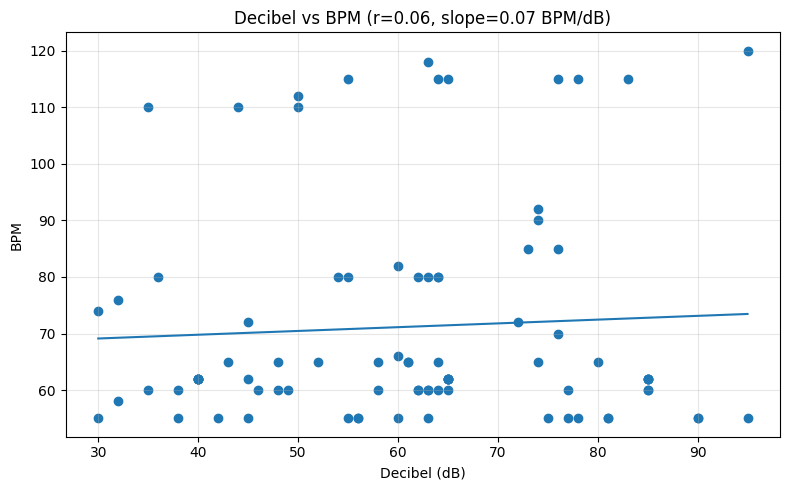

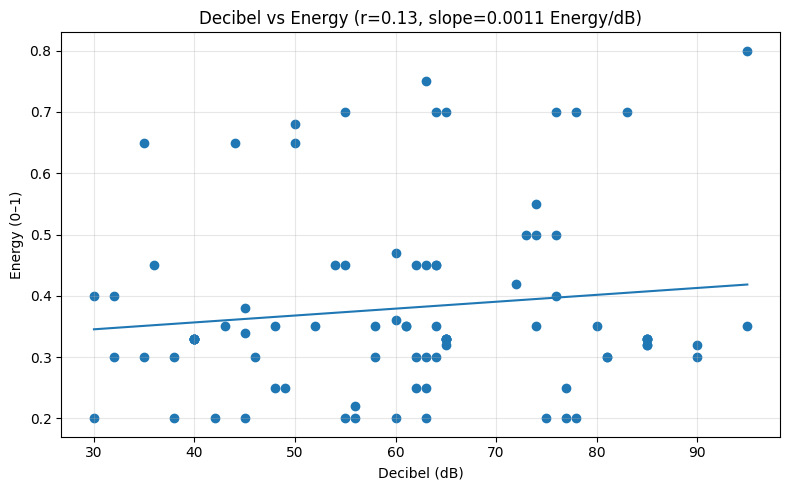


▶ 목표별 상관 (decibel ↔ BPM)


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\1950399442.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for k, g in df.groupby(group_col):


,goal,r,p_value,slope
0,active,0.8236,0.0010,0.1486
1,focus,0.7902,0.0008,0.2358
2,meditate,-0.8329,0.0053,-0.1350
3,neutral,-0.3644,0.1371,-0.0148
4,reading,0.7322,0.0161,0.1001
5,relax,0.0869,0.7777,0.0549
6,sleep,NaN,NaN,NaN



▶ 목표별 상관 (decibel ↔ Energy)


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\1950399442.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for k, g in df.groupby(group_col):


,goal,r,p_value,slope
0,active,0.7802,0.0028,0.0019
1,focus,0.8022,0.0006,0.0023
2,meditate,0.8383,0.0048,0.0015
3,neutral,-0.3644,0.1371,-0.0001
4,reading,0.5662,0.0880,0.0008
5,relax,0.3908,0.1867,0.0014
6,sleep,-0.0051,0.9876,-0.0000



▶ 장소별 상관 (decibel ↔ BPM)


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\1950399442.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for k, g in df.groupby(group_col):


,location,r,p_value,slope
0,cafe,0.1890,0.5363,0.2865
1,home,0.2762,0.3191,0.3310
2,library,-0.1946,0.4542,-0.2418
3,office,-0.2838,0.3054,-0.6734
4,outdoor,-0.0376,0.9028,-0.0432
5,subway,0.2332,0.4030,0.4415



▶ 장소별 상관 (decibel ↔ Energy)


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\1950399442.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for k, g in df.groupby(group_col):


,location,r,p_value,slope
0,cafe,0.0956,0.7561,0.0011
1,home,0.3414,0.2130,0.0035
2,library,-0.1490,0.5681,-0.0014
3,office,-0.2498,0.3692,-0.0045
4,outdoor,0.1090,0.7230,0.0010
5,subway,0.2795,0.3131,0.0040



▶ 소음 구간별 평균 BPM


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\1950399442.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  band_avg = df.groupby("db_band")["bpm"].mean().reindex(labels_bins)


,mean_bpm
db_band,
0-35,72.17
36-50,69.19
51-65,71.21
66-80,77.07
81+,67.54


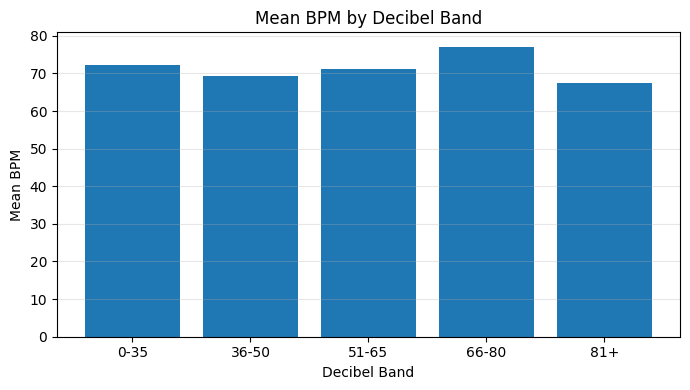

In [14]:
from scipy.stats import pearsonr
# ---------- 1) 기본 정리 ----------
# 소음 구간: 0–35, 36–50, 51–65, 66–80, 81+
bins = [0,35,50,65,80,200]
labels_bins = ["0-35","36-50","51-65","66-80","81+"]
df["db_band"] = pd.cut(df["decibel"], bins=bins, labels=labels_bins, right=True, include_lowest=True)

# 안전 검사
for c in ["decibel","bpm","energy","goal","location"]:
    if c not in df.columns:
        raise ValueError(f"필수 컬럼 누락: {c}")

# ---------- 2) 전체 상관관계 (BPM, Energy) ----------
x = df["decibel"].astype(float).values
y_bpm = df["bpm"].astype(float).values
y_en  = df["energy"].astype(float).values

r_bpm, p_bpm = pearsonr(x, y_bpm)
r_en,  p_en  = pearsonr(x, y_en)

# 선형회귀(기울기 = d(BPM)/d(dB))
m_bpm, b_bpm = np.polyfit(x, y_bpm, 1)
m_en,  b_en  = np.polyfit(x, y_en, 1)

print("▶ 전체 상관관계")
print(f"- decibel ↔ BPM   : r = {r_bpm:.3f}, p = {p_bpm:.4g}, slope = {m_bpm:.3f} BPM/dB")
print(f"- decibel ↔ Energy: r = {r_en:.3f},  p = {p_en:.4g},  slope = {m_en:.4f} Energy/dB")

# ---------- 3) 산점도 + 추세선 (BPM) ----------
plt.figure(figsize=(8,5))
plt.scatter(df["decibel"], df["bpm"])
# 추세선
x_line = np.linspace(df["decibel"].min(), df["decibel"].max(), 100)
y_line = m_bpm * x_line + b_bpm
plt.plot(x_line, y_line)
plt.title(f"Decibel vs BPM (r={r_bpm:.2f}, slope={m_bpm:.2f} BPM/dB)")
plt.xlabel("Decibel (dB)")
plt.ylabel("BPM")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 4) 산점도 + 추세선 (Energy) ----------
plt.figure(figsize=(8,5))
plt.scatter(df["decibel"], df["energy"])
x_line = np.linspace(df["decibel"].min(), df["decibel"].max(), 100)
y_line = m_en * x_line + b_en
plt.plot(x_line, y_line)
plt.title(f"Decibel vs Energy (r={r_en:.2f}, slope={m_en:.4f} Energy/dB)")
plt.xlabel("Decibel (dB)")
plt.ylabel("Energy (0–1)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 5) 목표별/장소별 상관계수 요약 ----------
def corr_by(group_col, y_col):
    rows = []
    for k, g in df.groupby(group_col):
        if g[y_col].nunique() < 2:
            rows.append((k, np.nan, np.nan, np.nan))
            continue
        r, p = pearsonr(g["decibel"].astype(float), g[y_col].astype(float))
        m, b = np.polyfit(g["decibel"].astype(float), g[y_col].astype(float), 1)
        rows.append((k, r, p, m))
    out = pd.DataFrame(rows, columns=[group_col, "r", "p_value", "slope"])
    return out.sort_values(group_col).reset_index(drop=True)

print("\n▶ 목표별 상관 (decibel ↔ BPM)")
display(corr_by("goal", "bpm").round(4))

print("\n▶ 목표별 상관 (decibel ↔ Energy)")
display(corr_by("goal", "energy").round(4))

print("\n▶ 장소별 상관 (decibel ↔ BPM)")
display(corr_by("location", "bpm").round(4))

print("\n▶ 장소별 상관 (decibel ↔ Energy)")
display(corr_by("location", "energy").round(4))

# ---------- 6) 보조: 소음 구간별 평균 BPM(마스킹 효과 시각 점검) ----------
band_avg = df.groupby("db_band")["bpm"].mean().reindex(labels_bins)
print("\n▶ 소음 구간별 평균 BPM")
display(band_avg.to_frame("mean_bpm").round(2))

plt.figure(figsize=(7,4))
plt.bar(band_avg.index.astype(str), band_avg.values)
plt.title("Mean BPM by Decibel Band")
plt.xlabel("Decibel Band")
plt.ylabel("Mean BPM")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


④ (장소 × 목표)별 평균 BPM / Mood 히트맵

▶ 커버리지(건수) 테이블


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3239770060.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["location","goal"])["bpm"]


,focus,relax,meditate,sleep,active,reading,neutral
location,,,,,,,
cafe,0,0,0,0,0,0,0
library,0,0,0,0,0,0,0
subway,0,0,0,0,0,0,0
office,0,0,0,0,0,0,0
outdoor,0,0,0,0,0,0,0
home,0,0,0,0,0,0,0


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3239770060.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_bpm = (df.pivot_table(index="location", columns="goal", values="bpm", aggfunc="mean")



▶ 미정의 조합 개수: 0


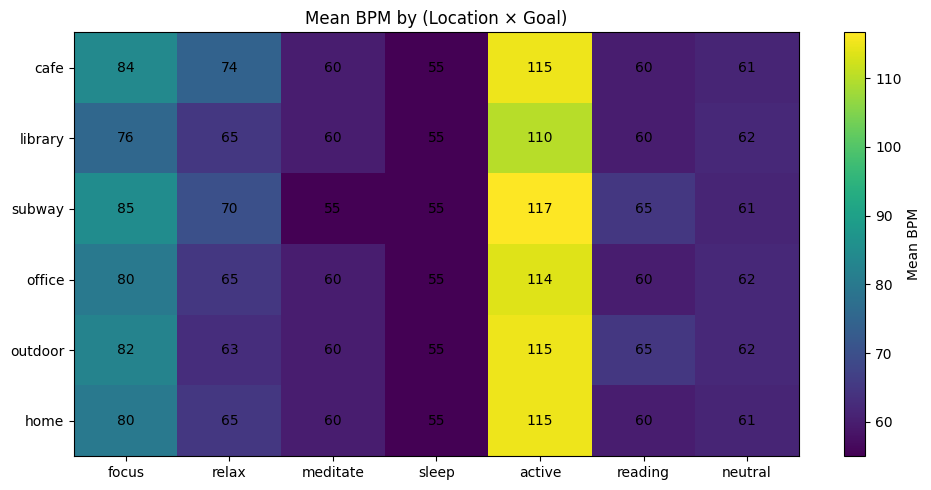

C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3239770060.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mood_table = (df.groupby(["location","goal"])
C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3239770060.py:64: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top_mood)
C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3239770060.py:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_

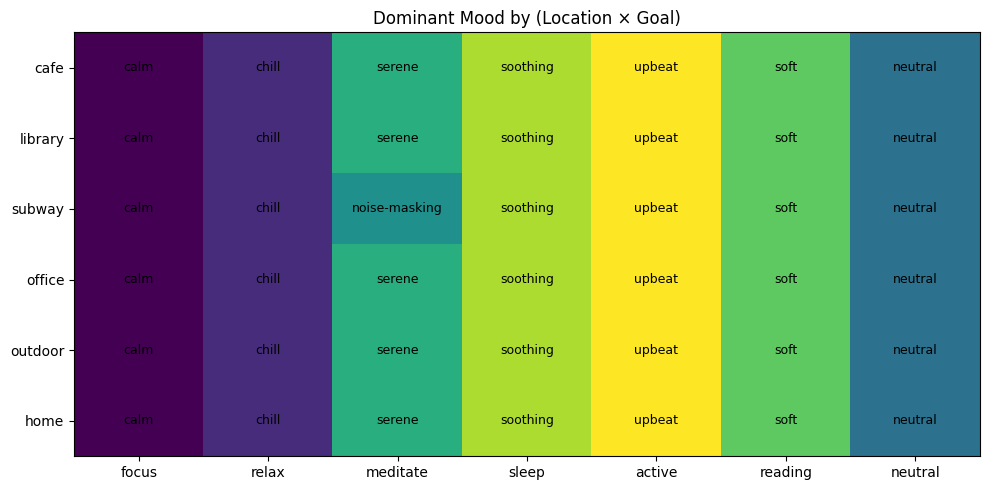

▶ 우세 Mood 비율(해당 셀 내 최빈 Mood 점유율)


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3239770060.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mood_pct = (df.groupby(["location","goal"])
C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3239770060.py:96: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(top_mood)


goal,focus,relax,meditate,sleep,active,reading,neutral
location,,,,,,,
cafe,0.67,1.0,1.0,1.0,1.00,1.0,1.0
library,1.00,1.0,1.0,1.0,1.00,1.0,1.0
subway,1.00,1.0,1.0,1.0,0.67,1.0,1.0
office,1.00,1.0,1.0,1.0,0.75,1.0,1.0
outdoor,1.00,0.5,1.0,1.0,1.00,1.0,1.0
home,1.00,1.0,1.0,1.0,1.00,1.0,1.0


In [17]:
from collections import Counter
# ---------- 1) 카테고리 순서 ----------
loc_order  = ["cafe","library","subway","office","outdoor","home"]
goal_order = ["focus","relax","meditate","sleep","active","reading","neutral"]
df["location"] = pd.Categorical(df["location"], categories=loc_order, ordered=True)
df["goal"]     = pd.Categorical(df["goal"],     categories=goal_order, ordered=True)

# ---------- 2) 커버리지(정의 여부) 점검 ----------
coverage = (df
            .groupby(["location","goal"])["bpm"]
            .agg(count="count", mean="mean")
            .unstack("goal")
            .reindex(index=loc_order, columns=goal_order))

print("▶ 커버리지(건수) 테이블")
display(coverage.fillna(0).astype(int))

# 미정의(데이터 0건) 조합 나열
missing = []
for L in loc_order:
    for G in goal_order:
        sub = df[(df["location"]==L) & (df["goal"]==G)]
        if len(sub)==0:
            missing.append((L,G))
print(f"\n▶ 미정의 조합 개수: {len(missing)}")
if missing:
    print("미정의 조합 예시(최대 15개):", missing[:15])

# ---------- 3) (장소×목표) 평균 BPM 히트맵 ----------
pivot_bpm = (df.pivot_table(index="location", columns="goal", values="bpm", aggfunc="mean")
               .reindex(index=loc_order, columns=goal_order))

fig, ax = plt.subplots(figsize=(10,5))
# 값 행렬
M = pivot_bpm.values.astype(float)
im = ax.imshow(M, aspect="auto")  # 색상 지정하지 않음(기본값 사용)
ax.set_xticks(np.arange(len(goal_order)))
ax.set_yticks(np.arange(len(loc_order)))
ax.set_xticklabels(goal_order, rotation=0)
ax.set_yticklabels(loc_order)
ax.set_title("Mean BPM by (Location × Goal)")
plt.colorbar(im, ax=ax, label="Mean BPM")

# 값 주석
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        v = M[i,j]
        txt = "" if np.isnan(v) else f"{v:.0f}"
        ax.text(j, i, txt, ha="center", va="center")

plt.tight_layout()
plt.show()

# ---------- 4) (장소×목표) 우세 Mood 히트맵 ----------
# 각 셀에서 최빈 mood 및 비율 계산
def top_mood(g):
    if len(g)==0:
        return pd.Series({"mood_code": np.nan, "mood": np.nan, "pct": np.nan})
    c = Counter(g["mood"])
    top, cnt = c.most_common(1)[0]
    return pd.Series({"mood": top, "pct": cnt/len(g)})

mood_table = (df.groupby(["location","goal"])
                .apply(top_mood)
                .reset_index()
                .pivot(index="location", columns="goal", values="mood")
                .reindex(index=loc_order, columns=goal_order))

# 범주 → 코드 매핑(시각화를 위해 숫자화)
moods = sorted(pd.unique(df["mood"].dropna()))
mood2code = {m:i for i,m in enumerate(moods)}
code2mood = {i:m for m,i in mood2code.items()}

mood_code_matrix = mood_table.replace(mood2code).values.astype(float)

fig, ax = plt.subplots(figsize=(10,5))
im2 = ax.imshow(mood_code_matrix, aspect="auto")  # 색상 지정하지 않음
ax.set_xticks(np.arange(len(goal_order)))
ax.set_yticks(np.arange(len(loc_order)))
ax.set_xticklabels(goal_order)
ax.set_yticklabels(loc_order)
ax.set_title("Dominant Mood by (Location × Goal)")

# 코드 → 텍스트 주석
for i in range(mood_code_matrix.shape[0]):
    for j in range(mood_code_matrix.shape[1]):
        code = mood_code_matrix[i,j]
        txt = "" if np.isnan(code) else code2mood[int(code)]
        ax.text(j, i, txt, ha="center", va="center", fontsize=9)

plt.tight_layout()
plt.show()

# ---------- 5) 보조: 우세 Mood + 비율 표 ----------
mood_pct = (df.groupby(["location","goal"])
              .apply(top_mood)
              .reset_index()
              .pivot(index="location", columns="goal", values="pct")
              .reindex(index=loc_order, columns=goal_order))
print("▶ 우세 Mood 비율(해당 셀 내 최빈 Mood 점유율)")
display(mood_pct.round(2))

*한글폰트설정

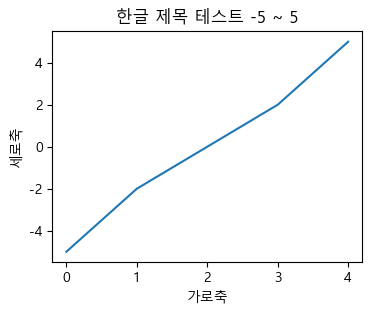

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 윈도우 기본 한글 폰트
rcParams["font.family"] = "Malgun Gothic"
rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# 확인
plt.figure(figsize=(4,3))
plt.title("한글 제목 테스트 -5 ~ 5")
plt.plot([-5, -2, 0, 2, 5])
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()


⑤ Fallback / 예외 구간 탐색 (Edge Case 분석)

전체 데이터 건수: 88
컬럼 목록: ['location', 'decibel', 'goal', 'playlist', 'mood', 'bpm', 'energy', 'vocal', 'genre', 'db_band']

▶ 예외 항목별 건수 요약


,항목,건수,비율(%)
0,데시벨 이상치,0,0.0
1,goal 누락,0,0.0
2,Fallback (Ambient Essentials),0,0.0



▶ 데시벨 이상치 없음 ✅

▶ goal 누락 없음 ✅

▶ Fallback(Ambient Essentials) 없음 ✅


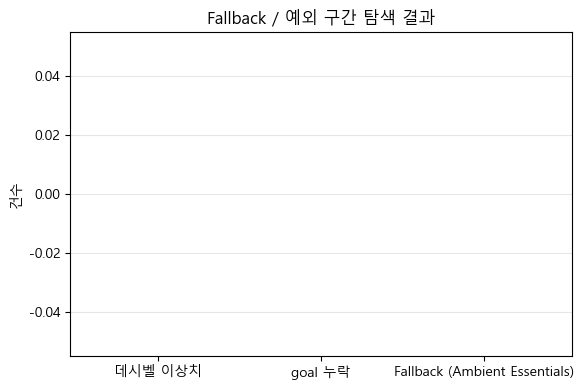

In [20]:
# ---------- 1) 기본 검사 ----------
print(f"전체 데이터 건수: {len(df)}")
print(f"컬럼 목록: {list(df.columns)}\n")

# ---------- 2) 이상치 탐색 ----------
# 데시벨 이상치 (0 이하, 120 이상)
mask_db_outlier = (df["decibel"] <= 0) | (df["decibel"] >= 120)
outliers_db = df[mask_db_outlier]

# goal 누락
mask_goal_missing = df["goal"].isna() | (df["goal"].astype(str).str.strip() == "")
outliers_goal = df[mask_goal_missing]

# genre가 Ambient Essentials → Fallback
mask_fallback = df["genre"].str.contains("ambient essentials", case=False, na=False)
outliers_fb = df[mask_fallback]

# ---------- 3) 결과 요약 ----------
summary = pd.DataFrame({
    "항목": ["데시벨 이상치", "goal 누락", "Fallback (Ambient Essentials)"],
    "건수": [len(outliers_db), len(outliers_goal), len(outliers_fb)]
})
summary["비율(%)"] = (summary["건수"] / len(df) * 100).round(2)
print("▶ 예외 항목별 건수 요약")
display(summary)

# ---------- 4) 예외 상세 미리보기 ----------
if len(outliers_db):
    print("\n▶ 데시벨 이상치 예시:")
    display(outliers_db.head(5)[["location","decibel","goal","playlist","genre"]])
else:
    print("\n▶ 데시벨 이상치 없음 ✅")

if len(outliers_goal):
    print("\n▶ goal 누락 예시:")
    display(outliers_goal.head(5)[["location","decibel","playlist","genre"]])
else:
    print("\n▶ goal 누락 없음 ✅")

if len(outliers_fb):
    print("\n▶ Fallback(Ambient Essentials) 발생 예시:")
    display(outliers_fb.head(5)[["location","decibel","goal","playlist","genre"]])
else:
    print("\n▶ Fallback(Ambient Essentials) 없음 ✅")

# ---------- 5) 시각화: 예외 항목 분포 ----------
plt.figure(figsize=(6,4))
plt.bar(summary["항목"], summary["건수"], color=["tomato","orange","skyblue"])
plt.title("Fallback / 예외 구간 탐색 결과")
plt.ylabel("건수")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ---------- 6) 참고: Fallback 발생 위치별 분포 ----------
if len(outliers_fb):
    fb_counts = outliers_fb["location"].value_counts().sort_index()
    plt.figure(figsize=(6,4))
    plt.bar(fb_counts.index, fb_counts.values, color="steelblue")
    plt.title("Fallback 발생 위치별 분포 (Ambient Essentials)")
    plt.ylabel("건수")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

+BPM vs Energy 밀도 그래프

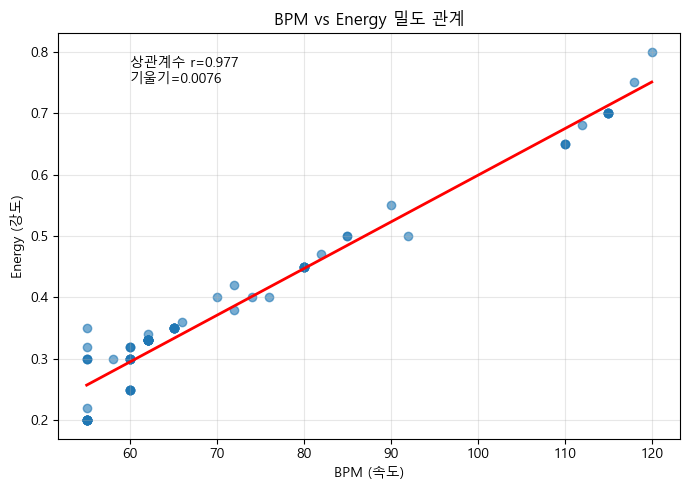

▶ 목표별 평균 BPM / Energy 요약


C:\Users\seonu\AppData\Local\Temp\ipykernel_9504\3865869222.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("goal")[["bpm","energy"]]


,bpm,energy
goal,,
active,114.17,0.70
focus,80.29,0.45
relax,66.92,0.37
neutral,61.67,0.33
reading,61.00,0.31
meditate,57.78,0.27
sleep,55.00,0.20


In [21]:
# --- 산점도 + 밀도 시각화 ---
plt.figure(figsize=(7,5))
plt.scatter(df["bpm"], df["energy"], alpha=0.6)
plt.title("BPM vs Energy 밀도 관계")
plt.xlabel("BPM (속도)")
plt.ylabel("Energy (강도)")
plt.grid(alpha=0.3)

# 추세선 추가
m, b = np.polyfit(df["bpm"], df["energy"], 1)
x_line = np.linspace(df["bpm"].min(), df["bpm"].max(), 100)
plt.plot(x_line, m*x_line + b, color="red", linewidth=2)
plt.text(df["bpm"].min()+5, df["energy"].max()-0.05,
         f"상관계수 r={df['bpm'].corr(df['energy']):.3f}\n기울기={m:.4f}", fontsize=10)
plt.tight_layout()
plt.show()

# --- 그룹별 비교 (goal 기준 평균값) ---
summary = (
    df.groupby("goal")[["bpm","energy"]]
      .mean().round(2)
      .sort_values("bpm", ascending=False)
)
print("▶ 목표별 평균 BPM / Energy 요약")
display(summary)


-> bpm과 energy는 높은 상관관계를 보임
-> 목표별 bpm이 높을수록 energ가 높음

+상관행렬(Heatmap)

▶ 상관계수 행렬


,decibel,bpm,energy
decibel,1.000,0.058,0.125
bpm,0.058,1.000,0.977
energy,0.125,0.977,1.000


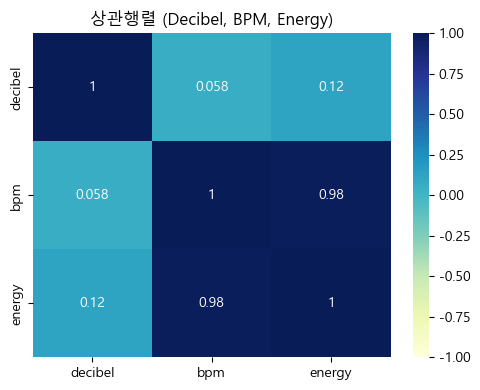

In [23]:
import seaborn as sns

# 수치형 컬럼만 추출
num_cols = ["decibel","bpm","energy"]
corr = df[num_cols].corr().round(3)
print("▶ 상관계수 행렬")
display(corr)

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("상관행렬 (Decibel, BPM, Energy)")
plt.tight_layout()
plt.show()

-> 데시벨은 bpm,energy 둘 다 상관관계 약함, 거의 없음